# Lista 3
-------------


Objetivo: agrupar conjunto de observações de um banco de dados.


Banco utilizado:


[Link](https://drive.google.com/file/d/1VMIUfwWfdeYRlABkqEppFT6f1sOj3q5B/view?usp=drive_link) para o banco


Descrição das variáveis:
> * gradyear: The graduation year of the high school student.
> * gender: The gender of the student (e.g., male or female).
> * age: The age of the student at the time of the survey.
> * NumberOffriends: The number of contacts or friends the student had on the social network.
> * basketball: The frequency or count of mentions of basketball in the student's profile.
> * football: The frequency or count of mentions of football in the student's profile.
> * soccer: The frequency or count of mentions of soccer in the student's profile.
> * softball: The frequency or count of mentions of softball in the student's profile.
> * volleyball: The frequency or count of mentions of volleyball in the student's profile.
> * swimming: The frequency or count of mentions of swimming in the student's profile.
> * cheerleading: The frequency or count of mentions of cheerleading in the student's profile.
> * baseball: The frequency or count of mentions of baseball in the student's profile.
> * tennis: The frequency or count of mentions of tennis in the student's profile.
> * sports: The overall frequency or count of mentions of sports in the student's profile.
> * cute: The frequency or count of mentions of cute in the student's profile.
> * sex: The frequency or count of mentions of sex in the student's profile.
> * sexy: The frequency or count of mentions of sexy in the student's profile.
> * hot: The frequency or count of mentions of hot in the student's profile.
> * kissed: The frequency or count of mentions of kissed in the student's profile.
> * dance: The frequency or count of mentions of dance in the student's profile.
> * band: The frequency or count of mentions of band in the student's profile.
> * marching: The frequency or count of mentions of marching in the student's profile.
> * music: The frequency or count of mentions of music in the student's profile.
> * rock: The frequency or count of mentions of rock in the student's profile.
> * god: The frequency or count of mentions of god in the student's profile.
> * church: The frequency or count of mentions of church in the student's profile.
> * jesus: The frequency or count of mentions of Jesus in the student's profile.
> * bible: The frequency or count of mentions of the Bible in the student's profile.
> * hair: The frequency or count of mentions of hair in the student's profile.
> * dress: The frequency or count of mentions of dress in the student's profile.
> * blonde: The frequency or count of mentions of blonde in the student's profile.
> * mall: The frequency or count of mentions of mall in the student's profile.
> * shopping: The frequency or count of mentions of shopping in the student's profile.
> * clothes: The frequency or count of mentions of clothes in the student's profile.
> * hollister: The frequency or count of mentions of Hollister (a brand) in the student's profile.
> * abercrombie: The frequency or count of mentions of Abercrombie (a brand) in the student's profile.
> * die: The frequency or count of mentions of die in the student's profile.
> * death: The frequency or count of mentions of death in the student's profile.
> * drunk: The frequency or count of mentions of drunk in the student's profile.
> * drugs: The frequency or count of mentions of drugs in the student's profile.


Exercício:

1. Carregue o banco de dados e analise suas features. Não utilizar as variaveis de idade e genero.
2. Gere 5 clusters dos estudantes com os algortimos KNN, aglomerativo e DBSCAN. Para o DBSCAN use eps = 5.
3. Há diferença nos agrupamentos entre os três algoritmos?
4. Realize a decomposição de componentes principais (PCA) com duas componentes para o dado.

  4.1 Qual o percentual da varibilidade é explicado com duas componentes?

  4.2 Construa um gráfico de pontos (scatterplot) onde no eixo x temos a primeira componente e no eixo y temos a segunda componente. A cor dos pontos deve representar os clusters formados por um dos algoritmos.

## 1.
--------------------
Carregue o banco de dados e analise suas features. Não utilizar as variaveis de idade e genero.

In [39]:
import pandas as pd
import numpy as np

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv("03_Clustering_Marketing.csv")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

In [41]:
#não utilizar as variaveis de idade e genero
df_cleaned = df.drop(columns=['age', 'gender'])

#### Todos os dados são numéricos e não há valores nulos.

# 2.
--------------------
Gere 5 clusters dos estudantes com os algortimos KNN, aglomerativo e DBSCAN. Para o DBSCAN use eps = 5.

## KNN


In [42]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.iloc[:, 1:])  # Ignorando a coluna 'gradyear' para a clusterização

# Aplicando K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Adicionar os clusters ao dataframe original
df['KMeans_cluster'] = pd.Series(kmeans_labels, index=df_cleaned.index)


C:\Users\Lucia\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Aglomerativo

In [44]:
# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglomerative.fit_predict(df_scaled)

# Adicionar os clusters ao dataframe original
df['Agglomerative_cluster'] = pd.Series(agglo_labels, index=df_cleaned.index)

## DBSCAN

In [45]:
# DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Adicionar os clusters ao dataframe original
df['DBSCAN_cluster'] = pd.Series(dbscan_labels, index=df_cleaned.index)

## 3.
-------------------------------
Há diferença nos agrupamentos?

O Silhouette Score é uma medida que indica quão bem cada ponto de dado se encaixa dentro de seu cluster. Valores mais próximos de +1 indicam que os pontos estão bem agrupados e claramente separados dos outros clusters, enquanto valores próximos de -1 indicam que os pontos estão mal agrupados.

In [46]:
from sklearn.metrics import silhouette_score

# silhouette_score(X, labels)
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
silhouette_agglo = silhouette_score(df_scaled, agglo_labels)
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)

# Compare os scores
print("Silhouette K-Means:", silhouette_kmeans)
print("Silhouette Agglomerative:", silhouette_agglo)
print("Silhouette DBSCAN:", silhouette_dbscan)


Silhouette K-Means: 0.27538031978168503
Silhouette Agglomerative: 0.25321549898133494
Silhouette DBSCAN: 0.3714052441286914


O Silhouette Score é uma medida que indica quão bem cada ponto de dado se encaixa dentro de seu cluster. É utilizada para avaliar a qualidade dos clusters sem rótulos, como é o caso do aprendizado não supervisionado.

Valores mais próximos de +1 indicam que os pontos estão bem agrupados e claramente separados dos outros clusters, enquanto valores próximos de -1 indicam que os pontos estão mal agrupados. 

O DBSCAN obteve o melhor resultado, com um Silhouette Score de 0.37, indicando que os pontos estão melhor agrupados e claramente separados dos outros cluster

## 4.
---------------------------
Realize a decomposição de componentes principais (PCA) com duas componentes para o dado.

----------------------------------
O PCA reduz a complexidade dos dados ao projetá-los em um número menor de dimensões (componentes principais) que capturam a maior parte da variabilidade nos dados. Isso torna possível visualizar os dados em um espaço bidimensional ou tridimensional, o que seria impraticável com o conjunto original de características devido à maldição da dimensionalidade.

In [47]:
from sklearn.decomposition import PCA

In [48]:
# Realizar PCA com duas componentes principais
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)



# Adicionando os componentes principais ao dataframe para visualização futura
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

## 4.1 
---------------------------
Qual o percentual da varibilidade é explicado com duas componentes?

In [49]:
# O percentual da variabilidade explicado pelas duas componentes principais
variabilidade_explicada = pca.explained_variance_ratio_
variabilidade_total = sum(variabilidade_explicada) * 100  # Convertido para porcentagem

print(f"Percentual da variabilidade explicado pelas duas componentes: {variabilidade_total:.2f}%")

Percentual da variabilidade explicado pelas duas componentes: 13.94%


## 4.2 
---------------------------
Construa um gráfico de pontos (scatterplot) onde no eixo x temos a primeira componente e no eixo y temos a segunda componente. A cor dos pontos deve representar os clusters formados por um dos algoritmos.

In [50]:
import matplotlib.pyplot as plt

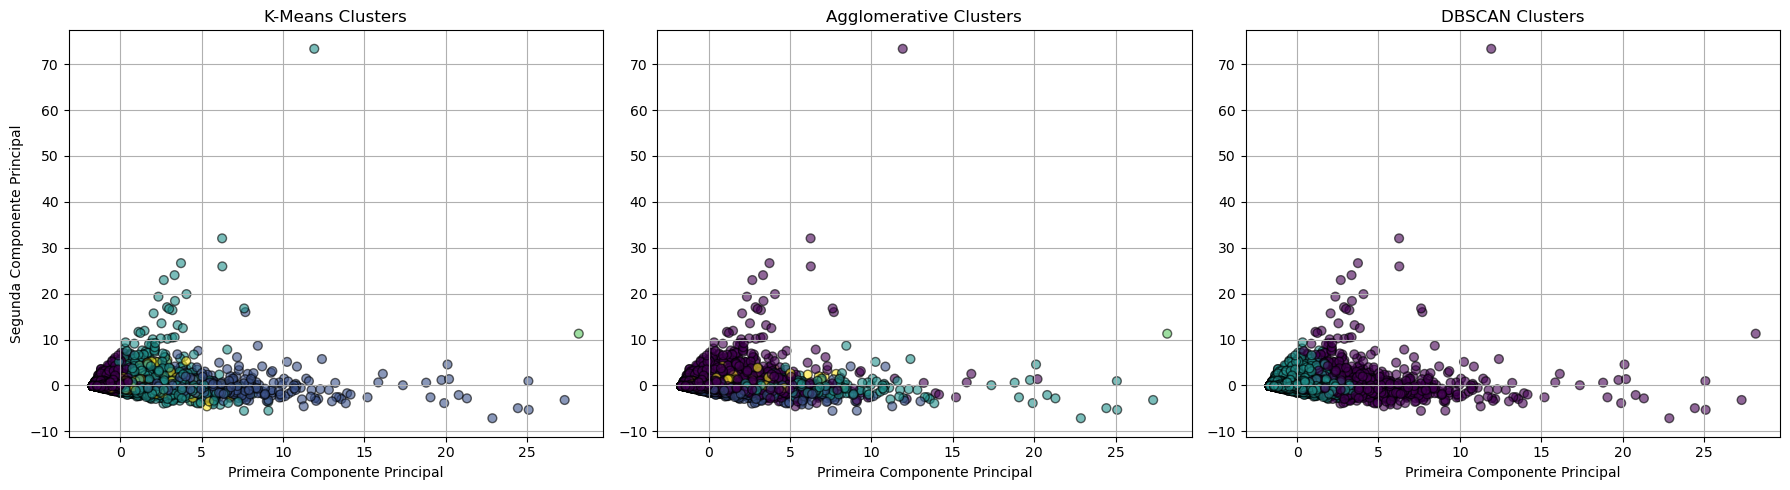

In [51]:
# Configuração do tamanho da figura para plotagem
plt.figure(figsize=(18, 5))

# K-Means
plt.subplot(1, 3, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.6)
plt.title('K-Means Clusters')
plt.xlabel('Primeira Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.grid(True)

# Agglomerative
plt.subplot(1, 3, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=agglo_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.6)
plt.title('Agglomerative Clusters')
plt.xlabel('Primeira Componente Principal')
plt.grid(True)

# DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.6)
plt.title('DBSCAN Clusters')
plt.xlabel('Primeira Componente Principal')
plt.grid(True)

# Ajuste final para evitar sobreposição dos subplots
plt.tight_layout()

# Mostrar o gráfico
plt.show()


## Avaliação
---------------------------
O gráfico parece confirmar o Silhouette Score obtido anteriormente. O DBSCAN parece ter agrupado os pontos de dados de forma mais clara e distinta, enquanto os outros algoritmos parecem ter mais sobreposição entre os clusters.

# Extra
---------------------------
Vamos tentar visualizar os clusters em um espaço tridimensional.

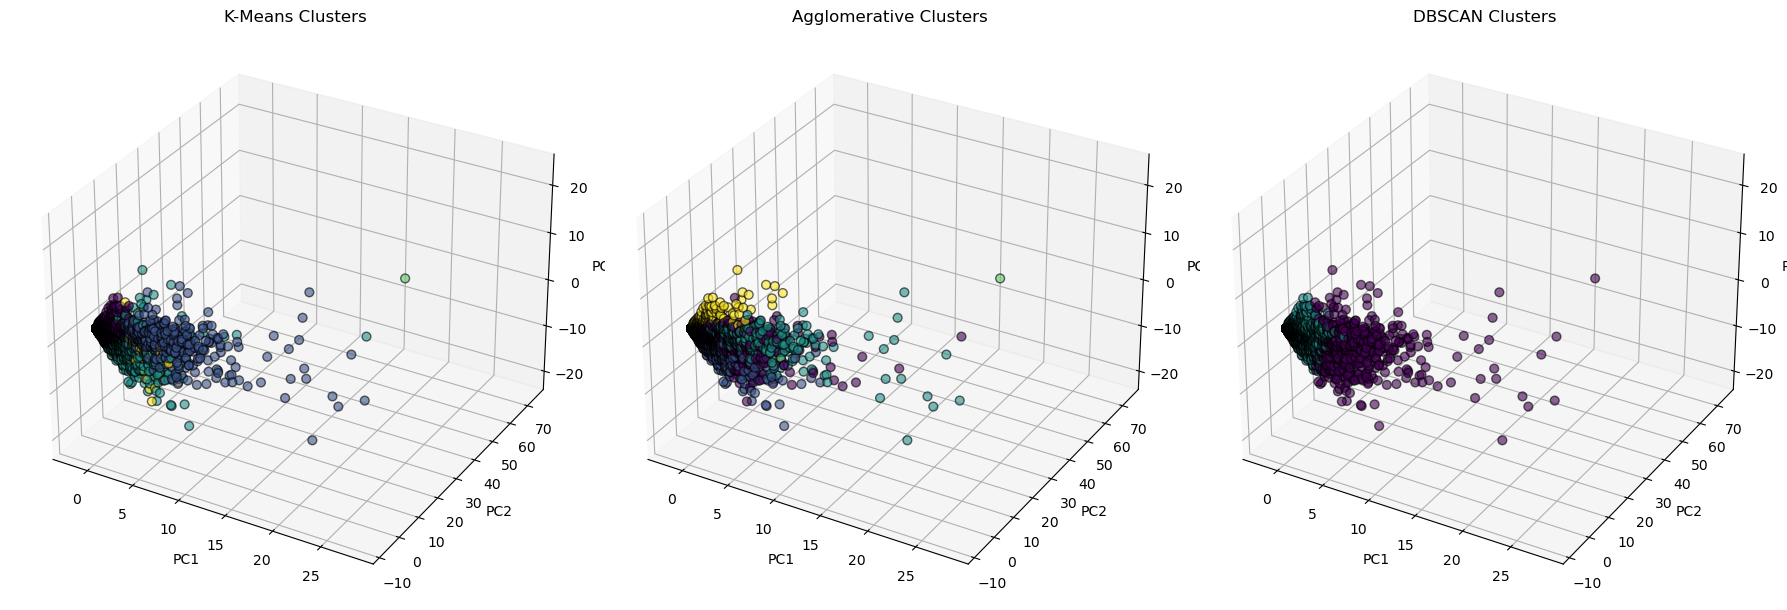

In [52]:
from mpl_toolkits.mplot3d import Axes3D

# Primeiro, realizamos PCA para três componentes principais
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# Configuração da figura para plotagem 3D
fig = plt.figure(figsize=(18, 6))

# K-Means
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=kmeans_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.6)
ax1.set_title('K-Means Clusters')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Agglomerative
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=agglo_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.6)
ax2.set_title('Agglomerative Clusters')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

# DBSCAN
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=dbscan_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.6)
ax3.set_title('DBSCAN Clusters')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')

# Ajuste final para evitar sobreposição dos subplots
plt.tight_layout()

# Mostrar o gráfico
plt.show()


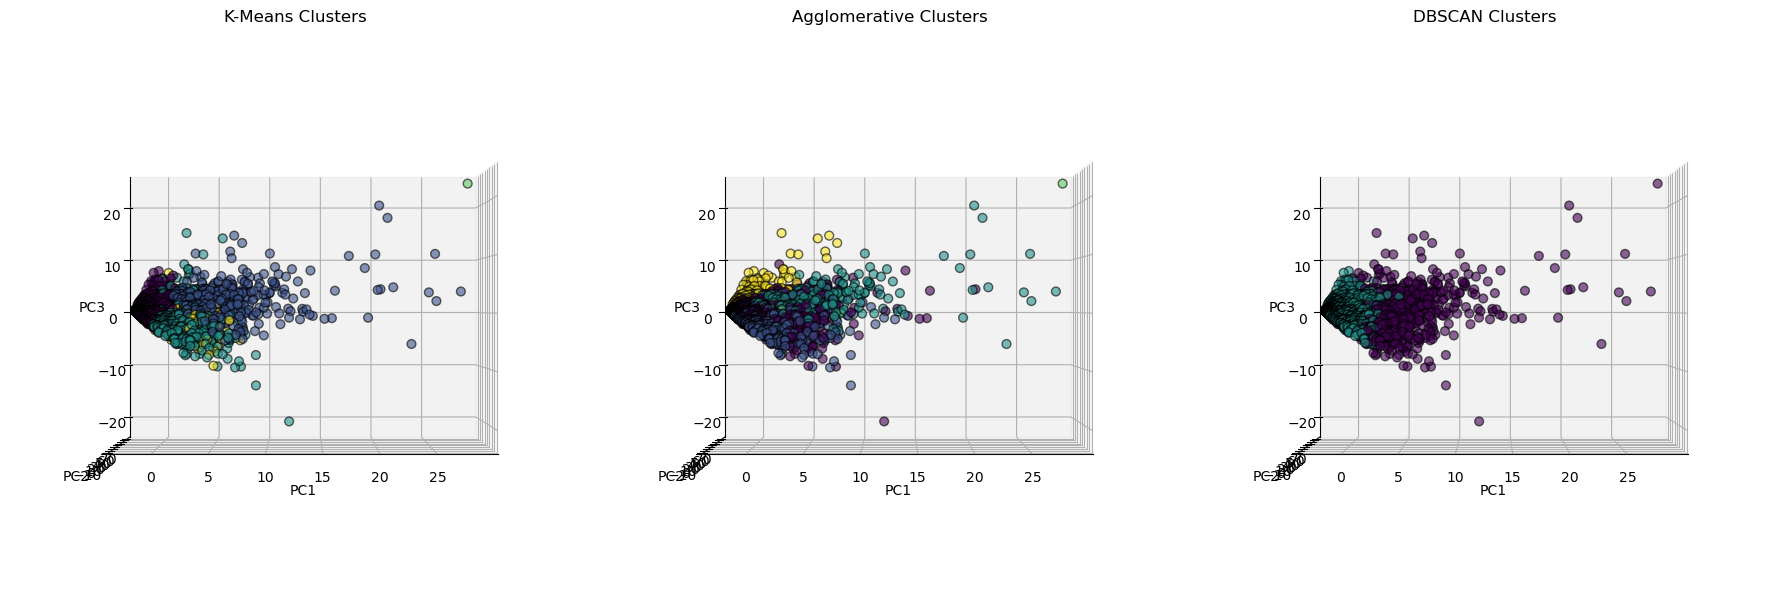

In [63]:
from mpl_toolkits.mplot3d import Axes3D

# Primeiro, realizamos PCA para três componentes principais
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# Configuração da figura para plotagem 3D
fig = plt.figure(figsize=(18, 6))

# K-Means
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=kmeans_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.6)
ax1.view_init(elev=0, azim=-90)
ax1.set_title('K-Means Clusters')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Agglomerative
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=agglo_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.6)
ax2.view_init(elev=0, azim=-90)
ax2.set_title('Agglomerative Clusters')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

# DBSCAN
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=dbscan_labels, cmap='viridis', edgecolor='k', s=40, alpha=0.6)
ax3.view_init(elev=0, azim=-90)
ax3.set_title('DBSCAN Clusters')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')

# Ajuste final para evitar sobreposição dos subplots
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Em um espaço tridimensional, podemos ver angulos diferentes nos dando uma melhor visualização dos clusters formados.
nesse caso específico não houve muita diferença para o plano 2D mas ainda sim podemos observar mais claramente as separações, principalmente no Agglomerative. Mas DBSCAN ainda se destaca como o melhor algoritmo para esse conjunto de dados.